In [ ]:
# See if we can't refactor these functions into one pre-processing function. 
# Compile into pipeline
# Add the feature of getting rid of names
# Work on creating more columns (see doc for list of columns to make)
# Columns: Sentences, noun phrases, keywords, etc.

In [1]:
import bs4

import matplotlib.pyplot as plt

import networkx as nx

import numpy as np

# For reading files
import os

# Data manipulation
import pandas as pd

# Sentence boundary detection
import pysbd

# Text cleaning
import re

import requests

## Text processing
# NLP
import spacy
from spacy.lang.en import English
from spacy.matcher import Matcher
from spacy.tokens import Span
nlp = spacy.load("en_core_web_sm")
from pysbd.utils import PySBDFactory


# More NLP for fun
from textblob import TextBlob

from tqdm import tqdm

# Pipeline creation
from sklearn.pipeline import Pipeline

# Text extraction
from tika import parser

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [2]:
# Wanted to see details
pd.options.display.max_rows = 999

### Breakdown sentences

<!--  Insert list of sentences into each cell  -->

In [54]:
df = pd.read_csv(r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\raw_data.csv", index_col=0)

In [55]:
df.head()

username                        title  \
0  Aakash Patel                Media Planner   
1    Aaron Neal                Media Planner   
2  Aaron Penzel                Media Planner   
3   Abby Cleary                Media Planner   
4   Abdul Albab  Accounts Payable Specialist   

                                                                                                                                                                                         raw_cover_letters  \
0  I was excited to discover the Media Planner position with Rookieplay, which I saw posted on Indeed. Rookieplay is a company on the rise, and as a recent college graduate with 2 years of diverse ma...   
1  Dear Hiring Manager,I am writing to you today to apply for the open position of Media Planner. As a marketing professional with 2+ years of experience I believe that I will be an asset to the Rook...   
2  Dear Hiring Manager,I am writing to express interest in Rookieplay’s Media Planner position. I am a creative and out-of-the-box marketer in the entertainment industry, with experience in both non-...   
3                                                                                                                                                                                                      NaN   
4                                                                                                                                                                                                      NaN   

                                                                                                                                                                                                raw_resume  
0  Microsoft Word - Aakash Patel  1\tAakash Patel aakashp047@gmail.com v (516) 404-6119 v Syosset, NY  EDUCATION    Stony Brook University                                                             ...  
1  _Aaron Neal_052020_v2A A R O N  M .  N E A LSTRATEGISTPERSONALTRAITS & SKILLSEDUCATIONCONTACT770.871.5294aaronm.neal3@gmail.comProficient in Simmons OneView, Global Web Index MS Office Perspective...  
2  AARON PENZELAARON PENZELENTERTAINMENT ADVERTISERCONTACTPHONE: (908) 217-7289 EMAIL: A.PENZEL724@GMAIL.COM 23-43 28TH STREET LONG ISLAND CITY, NY 11105 WORK  EXPERIENCEManaged all traditional media...  
3   Abby ClearyBuffalo, NYabbycleary7_pb3@indeedemail.com(716) 238-0440Authorized to work in the US for any employerWork ExperienceInternSwanson Communications - New York, NYJune 2019 to Present• Ass...  
4   Abdul AlbabBronx, NY 10467abdulalbab2_n6u@indeedemail.com(347) 615-8170Work ExperienceAccountantCS Corporation - Bronx, NYJune 2017 to Present• Manage and oversee daily Accounts Payable and Accou...

In [56]:
df_cover_letters = df[['username', 'raw_cover_letters']]

In [31]:
df_resumes = df[['username', 'raw_resume']]

In [57]:
df_cover_letters = df_cover_letters.dropna()

In [32]:
df_resumes = df_resumes.dropna()

In [58]:
df_cover_letters = df_cover_letters.reset_index(drop=True)

In [26]:
df_resumes = df_resumes.reset_index(drop=True)

In [11]:
len(df_cover_letters.raw_cover_letters)

467

In [44]:
df_resumes.raw_resume[0]

"Microsoft Word - Aakash Patel  1\tAakash Patel aakashp047@gmail.com v (516) 404-6119 v Syosset, NY  EDUCATION    Stony Brook University                                                                     December 2019 Bachelor of Science in Business Management, GPA 3.45/4.0                    Stony Brook, NY § Member of the American Marketing Association, Economics Club, and South Asian Student Alliance § Studied abroad in Madrid, Spain during the Spring 2019 semester (Universidad Carlos III de Madrid)  WORK EXPERIENCE   Keller Williams Realty                              May 2018 – Aug. 2018 Marketing Intern                             New York, NY § Member of the renowned luxury real estate practice of the Nicole Gary Team, one of the highest grossing Keller Williams teams worldwide. § Honed speaking skills by interacting with clients and maintaining a CRM database (Base). § Perfected the use of Wix in order to make improvements to the team website used to attract new clients. § Uti

In [48]:
sentences = []
for resume in df_resumes.raw_resume:
    doc = nlp(resume)
    extracted_sentences = (list(doc.sents))
    sentences.append(extracted_sentences)


In [59]:
sentences = []
for cover_letter in df_cover_letters.raw_cover_letters:
    doc = nlp(cover_letter)
    extracted_sentences = (list(doc.sents))
    sentences.append(extracted_sentences)

In [49]:
sentences

[[Microsoft Word - Aakash Patel  1	,
  Aakash Patel,
  aakashp047@gmail.com v (516),
  404-6119 v Syosset, NY  EDUCATION    Stony Brook University                                                                     December 2019 Bachelor of Science in Business Management, GPA 3.45/4.0                    Stony Brook, NY § Member of the American Marketing Association, Economics Club, and South Asian Student Alliance § Studied abroad in Madrid, Spain during the Spring 2019 semester (Universidad Carlos III de Madrid)  ,
  WORK EXPERIENCE   ,
  Keller Williams Realty                              ,
  May 2018 – Aug. 2018,
  Marketing Intern                             ,
  New York, NY § Member of the renowned luxury real estate practice of the Nicole Gary Team, one of the highest grossing Keller Williams teams worldwide.,
  §,
  Honed speaking skills by interacting with clients and maintaining a CRM database (Base).,
  § Perfected the use of Wix in order to make improvements to the team webs

In [39]:
# Breakdown documents into sentences with pysbd and spacy
# It seems like with this example with spacy is the better option for parsing sentences
sentences = []
def extract_sentences():
    sentences = []
    for resume in df_resumes.raw_resume:
    #     cover_letter = df_cover_letters.raw_cover_letters[0]
        doc = nlp(resume)
        extracted_sentences = (list(doc.sents))
        if extracted_sentences == None:
            print(df_resumes['username'] + ' is bad.')
        sentences.append(extracted_sentences)

extract_sentences()


In [50]:
df_resumes['resume_sentences'] = sentences

In [60]:
df_cover_letters['cover_letter_sentences'] = sentences

In [17]:
len(df_cover_letters['cover_letter_sentences'][0])

20

In [52]:
df_cover_letters['raw_cover_letters'] = 'raw_text'

In [63]:
df_resumes.to_csv('data/tokens_df.csv')

In [64]:
df_cover_letters.to_csv('data/cover_tokens_df.csv')

In [51]:
df_resumes

username  \
0            Aakash Patel   
1              Aaron Neal   
2            Aaron Penzel   
3             Abby Cleary   
4             Abdul Albab   
...                   ...   
2646           Zichen Nie   
2647           Zihao Zhou   
2648          Zira Cortes   
2649       Zoya Buyankina   
2651  Zughem Tovar-Riezgo   

                                                                                                                                                                                                   raw_resume  \
0     Microsoft Word - Aakash Patel  1\tAakash Patel aakashp047@gmail.com v (516) 404-6119 v Syosset, NY  EDUCATION    Stony Brook University                                                             ...   
1     _Aaron Neal_052020_v2A A R O N  M .  N E A LSTRATEGISTPERSONALTRAITS & SKILLSEDUCATIONCONTACT770.871.5294aaronm.neal3@gmail.comProficient in Simmons OneView, Global Web Index MS Office Perspective...   
2     AARON PENZELAARON PENZELENTERTAINMENT ADVERTISERCONTACTPHONE: (908) 217-7289 EMAIL: A.PENZEL724@GMAIL.COM 23-43 28TH STREET LONG ISLAND CITY, NY 11105 WORK  EXPERIENCEManaged all traditional media...   
3      Abby ClearyBuffalo, NYabbycleary7_pb3@indeedemail.com(716) 238-0440Authorized to work in the US for any employerWork ExperienceInternSwanson Communications - New York, NYJune 2019 to Present• Ass...   
4      Abdul AlbabBronx, NY 10467abdulalbab2_n6u@indeedemail.com(347) 615-8170Work ExperienceAccountantCS Corporation - Bronx, NYJune 2017 to Present• Manage and oversee daily Accounts Payable and Accou...   
...                                                                                                                                                                                                       ...   
2646  ZICHEN (CONSTANCE) NIEHacienda Heightsznie003@ucr.edu951-213-1736Professional                   Auditing, Systems, Managerial, Financial Statement Analysis, Fraud and Forensic Accounting, ITSkills...   
2647   Zihao ZhouManager / Business Development DirectorBoston, MALike challenging new tasks. Positive personality. Good at communication, experienced marketing andproducts specialist.Willing to relocat...   
2648   Zira CortesSubstitute Teacher - SANDRIDGE Elementary SchoolChicago, IL 60633ziracortes9_rew@indeedemail.com(773)-704-4172I am seeking a full-time position where I can use my experience and educat...   
2649  ZOYA BUYANKINA SUMMARY: A young, self-motivated and achievement-oriented Business Development Analyst with more than 3 years of experience in the business development process and different marketi...   
2651   Zughem Tovar-Riezgo  40 Westwood Circle Roslyn Heights, NY 11577 (347) 581-4703 priezgo@gmail.com EXPERIENCE Rinapher Inc, ​Astoria, NY  — ​Administrative Assistant /Bookkeeper​ ​June 2015 - Febr...   

                                                                                                                                                                                             resume_sentences  
0     [(Microsoft, Word, -, Aakash, Patel,  , 1, \t), (Aakash, Patel), (aakashp047@gmail.com, v, (, 516, )), (404, -, 6119, v, Syosset, ,, NY,  , EDUCATION,    , Stony, Brook, University,               ...  
1     [(_), (Aaron, Neal_052020_v2A, A, R, O, N,  , M, .,  ), (N), (E, A, LSTRATEGISTPERSONALTRAITS, &, SKILLSEDUCATIONCONTACT770.871.5294aaronm.neal3@gmail.comProficient, in, Simmons, OneView, ,, Globa...  
2     [(AARON, PENZELAARON, PENZELENTERTAINMENT, ADVERTISERCONTACTPHONE, :), ((, 908, ), 217, -, 7289, EMAIL, :, A.PENZEL724@GMAIL.COM, 23, -, 43, 28TH, STREET, LONG, ISLAND, CITY, ,, NY, 11105), (WORK,...  
3     [( , Abby, ClearyBuffalo, ,, NYabbycleary7_pb3@indeedemail.com(716, )), (238, -, 0440Authorized, to, work, in, the, US, for, any, employerWork, ExperienceInternSwanson, Communications, -, New, Yor...  
4     [( , Abdul, AlbabBronx, ,, NY, 10467abdulalbab2_n6u@indeedemail.com(347, )), (615, -, 8170Work), (ExperienceAccou

In [100]:
df_cover_letters

all_text  \
0  0_KennyMcLeodResumeKenneth McLeod kennethkmcleodjr@gmail.com ❖ (718) 514-1871 WORK EXPERIENCE  Tse-Systems China LTD.                         2016 – Present Operations Manager                     ...   
1  Ali Farhat_Cover LetterDear Hiring Manager, I am seeking the dynamic marketing position at your company. I'm a dedicated and organized marketer who highly values creativity, autonomy, communicatio...   
2                                                                                                                                         [LocalizedFileNames]\rMA_CoverLetter.pdf=@MA_CoverLetter.pdf,0\r   
3   234 Pulaski St, Brooklyn, NY 11206, USA     Brooklyn, NY, 11206    (718) 772-2732    jjasonworleyy@gmail.comJason Worley234 Pulaski St, Brooklyn, NY 11206, USA  Brooklyn, NY, 11206(718) 772-2732j...   
4  J O A N N E   S E P H I N E, AJ O A N N E   S E P H I N E 500 East 77 Street, 1012    New York, NY 10162   917-797-9945    joanne@joannesephine.com May 2, 2019 Rewardyd New York, NY Re: Marketing ...   

  sentences  
0            
1            
2            
3            
4

In [48]:
doc = nlp(sentences[3])

for tok in doc:
    print(tok.text, "...", tok.dep_)

Nonetheless ... advmod
, ... punct
I ... nsubj
decided ... ROOT
to ... aux
immerse ... xcomp
myself ... dobj
in ... prep
more ... amod
marketing ... compound
fields ... pobj
after ... prep
working ... pcomp
as ... prep
an ... det
Account ... compound
Management ... compound
Intern ... pobj
in ... prep
Summer ... pobj
2017 ... nummod
at ... prep
engageSimply ... pobj
. ... punct


In [31]:
len(doc)

1934

In [18]:
# Get rid of punctuation and numbers for token preparation
def preprocessor(text):
    if type(text) == str:
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', ' ', text.lower())
    return text

In [19]:
doc = preprocessor(doc)

In [20]:
doc

'0_kennymcleodresumekenneth mcleod kennethkmcleodjr gmail com 718 514 1871 work experience tse systems china ltd 2016 present operations manager remote served as project manager for multiple projects including developing and implementing technical training pro grams and developing processes focused on client retention analyzed relevant data to make business recom mendations that resulted in market growth quality and reliability improvements and contractor supply increases perform employee performance reviews and recommend appropriate salary changes interview job applicants planned scheduled and monitored transportation of 5 million dollars worth of equipment flawlessly without loss or damage stone mart 2014 2016 marketing manager tampa fl developed and launched integrated multi channel print catalog web and direct marketing campaigns that pro pelled sales from 45m to a projected 50m by year end managed corporate marketing and communications functions overseeing a 400 000 budget and 8 m

In [21]:
print(seg.segment(doc))

['0_kennymcleodresumekenneth mcleod kennethkmcleodjr gmail com 718 514 1871 work experience tse systems china ltd 2016 present operations manager remote served as project manager for multiple projects including developing and implementing technical training pro grams and developing processes focused on client retention analyzed relevant data to make business recom mendations that resulted in market growth quality and reliability improvements and contractor supply increases perform employee performance reviews and recommend appropriate salary changes interview job applicants planned scheduled and monitored transportation of 5 million dollars worth of equipment flawlessly without loss or damage stone mart 2014 2016 marketing manager tampa fl developed and launched integrated multi channel print catalog web and direct marketing campaigns that pro pelled sales from 45m to a projected 50m by year end managed corporate marketing and communications functions overseeing a 400 000 budget and 8 

In [40]:
print('Original Article: %s' % (doc))
print()

for i, token in enumerate(doc.sents):
    print('-->Sentence %d: %s' % (i, token.text))

Original Article: 0_kennymcleodresumekenneth mcleod kennethkmcleodjr gmail com 718 514 1871 work experience tse systems china ltd 2016 present operations manager remote served as project manager for multiple projects including developing and implementing technical training pro grams and developing processes focused on client retention analyzed relevant data to make business recom mendations that resulted in market growth quality and reliability improvements and contractor supply increases perform employee performance reviews and recommend appropriate salary changes interview job applicants planned scheduled and monitored transportation of 5 million dollars worth of equipment flawlessly without loss or damage stone mart 2014 2016 marketing manager tampa fl developed and launched integrated multi channel print catalog web and direct marketing campaigns that pro pelled sales from 45m to a projected 50m by year end managed corporate marketing and communications functions overseeing a 400 0

AttributeError: 'str' object has no attribute 'sents'

In [34]:
# Tokenizes document
token_list = []
def spacy_tokenizer(text):
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(doc)
    for token in tokens:
        token_list.append(token.text)
    return token_list
spacy_tokenizer(doc)

['0_KennyMcLeodResumeKenneth',
 'McLeod',
 'kennethkmcleodjr@gmail.com',
 '❖',
 '(',
 '718',
 ')',
 '514',
 '-',
 '1871',
 'WORK',
 'EXPERIENCE',
 ' ',
 'Tse',
 '-',
 'Systems',
 'China',
 'LTD',
 '.',
 '                        ',
 '2016',
 '–',
 'Present',
 'Operations',
 'Manager',
 '                         ',
 'Remote',
 '▪',
 'Served',
 'as',
 'project',
 'manager',
 'for',
 'multiple',
 'projects',
 ',',
 'including',
 'developing',
 'and',
 'implementing',
 'technical',
 'training',
 'pro',
 '-',
 'grams',
 'and',
 'developing',
 'processes',
 'focused',
 'on',
 'client',
 'retention',
 ';',
 'analyzed',
 'relevant',
 'data',
 'to',
 'make',
 'business',
 'recom',
 '-',
 'mendations',
 'that',
 'resulted',
 'in',
 'market',
 'growth',
 ',',
 'quality',
 'and',
 'reliability',
 'improvements',
 'and',
 'contractor',
 'supply',
 'increases',
 '.',
 '▪',
 'Perform',
 'employee',
 'performance',
 'reviews',
 'and',
 'recommend',
 'appropriate',
 'salary',
 'changes',
 ';',
 'intervi

In [35]:
len(token_list)

413

In [36]:
# Lemmatizes and removes stop words
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
lemma_list = []
def spacy_lemmatizer(text):
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(text)
    for token in tokens:
        if token.is_stop is False:
            lemma_list.append(token.lemma_)
    return lemma_list
spacy_lemmatizer(doc)

['0_KennyMcLeodResumeKenneth',
 'McLeod',
 'kennethkmcleodjr@gmail.com',
 '❖',
 '(',
 '718',
 ')',
 '514',
 '-',
 '1871',
 'WORK',
 'EXPERIENCE',
 ' ',
 'Tse',
 '-',
 'Systems',
 'China',
 'LTD',
 '.',
 '                        ',
 '2016',
 '–',
 'Present',
 'Operations',
 'Manager',
 '                         ',
 'Remote',
 '▪',
 'Served',
 'project',
 'manager',
 'multiple',
 'projects',
 ',',
 'including',
 'developing',
 'implementing',
 'technical',
 'training',
 'pro',
 '-',
 'grams',
 'developing',
 'processes',
 'focused',
 'client',
 'retention',
 ';',
 'analyzed',
 'relevant',
 'data',
 'business',
 'recom',
 '-',
 'mendations',
 'resulted',
 'market',
 'growth',
 ',',
 'quality',
 'reliability',
 'improvements',
 'contractor',
 'supply',
 'increases',
 '.',
 '▪',
 'Perform',
 'employee',
 'performance',
 'reviews',
 'recommend',
 'appropriate',
 'salary',
 'changes',
 ';',
 'interview',
 'job',
 'applicants',
 '.',
 '▪',
 'Planned',
 ',',
 'scheduled',
 'monitored',
 'transp

In [37]:
len(lemma_list)

365

In [39]:
# Eliminates symbols. Use on lemma list!
import re
def preprocessor(text):
    if type(text) == str:
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', '', text.lower())
    return text
from spacy.lang.en import English
nlp = English()
tokenizer = nlp.Defaults.create_tokenizer(nlp)
tokens = tokenizer(doc)
lemma_list = []
for token in tokens:
    if token.is_stop is False:
        token_preprocessed = preprocessor(token.lemma_)
        if token_preprocessed != '':
             lemma_list.append(token_preprocessed)
preprocessor(lemma_list)

['0_kennymcleodresumekenneth',
 'mcleod',
 'kennethkmcleodjrgmailcom',
 '718',
 '514',
 '1871',
 'work',
 'experience',
 'tse',
 'systems',
 'china',
 'ltd',
 '2016',
 'present',
 'operations',
 'manager',
 'remote',
 'served',
 'project',
 'manager',
 'multiple',
 'projects',
 'including',
 'developing',
 'implementing',
 'technical',
 'training',
 'pro',
 'grams',
 'developing',
 'processes',
 'focused',
 'client',
 'retention',
 'analyzed',
 'relevant',
 'data',
 'business',
 'recom',
 'mendations',
 'resulted',
 'market',
 'growth',
 'quality',
 'reliability',
 'improvements',
 'contractor',
 'supply',
 'increases',
 'perform',
 'employee',
 'performance',
 'reviews',
 'recommend',
 'appropriate',
 'salary',
 'changes',
 'interview',
 'job',
 'applicants',
 'planned',
 'scheduled',
 'monitored',
 'transportation',
 '5',
 'million',
 'dollars',
 'worth',
 'equipment',
 'flawlessly',
 'loss',
 'damage',
 'stone',
 'mart',
 '2014',
 '2016',
 'marketing',
 'manager',
 'tampa',
 'fl',
 

In [40]:
len(lemma_list)

249

In [19]:
return_list = []
def preprocessor_final(text):
    if isinstance((text), (str)):
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', '', text.lower())
        return text
    if isinstance((text), (list)):
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', '', text[i])
            temp_text = re.sub('[\W]+', '', temp_text.lower())
            return_list.append(temp_text)
        return(return_list)
    else:
        pass

In [20]:
preprocessor_final(lemma_list)

['0_kennymcleodresumekenneth',
 'mcleod',
 'kennethkmcleodjrgmailcom',
 '718',
 '514',
 '1871',
 'work',
 'experience',
 'tse',
 'systems',
 'china',
 'ltd',
 '2016',
 'present',
 'operations',
 'manager',
 'remote',
 'served',
 'project',
 'manager',
 'multiple',
 'projects',
 'including',
 'developing',
 'implementing',
 'technical',
 'training',
 'pro',
 'grams',
 'developing',
 'processes',
 'focused',
 'client',
 'retention',
 'analyzed',
 'relevant',
 'data',
 'business',
 'recom',
 'mendations',
 'resulted',
 'market',
 'growth',
 'quality',
 'reliability',
 'improvements',
 'contractor',
 'supply',
 'increases',
 'perform',
 'employee',
 'performance',
 'reviews',
 'recommend',
 'appropriate',
 'salary',
 'changes',
 'interview',
 'job',
 'applicants',
 'planned',
 'scheduled',
 'monitored',
 'transportation',
 '5',
 'million',
 'dollars',
 'worth',
 'equipment',
 'flawlessly',
 'loss',
 'damage',
 'stone',
 'mart',
 '2014',
 '2016',
 'marketing',
 'manager',
 'tampa',
 'fl',
 

In [41]:
len(return_list)

249

In [48]:
# Removes numerical strings from list
def int_filter( someList ):
    for v in someList:
        try:
            int(v)
            continue # Skip these
        except ValueError:
            yield v # Keep these

lemma_list = list( int_filter( lemma_list ))


In [51]:
len(lemma_list)

233

In [59]:
return_list

['0_kennymcleodresumekenneth',
 'mcleod',
 'kennethkmcleodjrgmailcom',
 '718',
 '514',
 '1871',
 'work',
 'experience',
 'tse',
 'systems',
 'china',
 'ltd',
 '2016',
 'present',
 'operations',
 'manager',
 'remote',
 'served',
 'project',
 'manager',
 'multiple',
 'projects',
 'including',
 'developing',
 'implementing',
 'technical',
 'training',
 'pro',
 'grams',
 'developing',
 'processes',
 'focused',
 'client',
 'retention',
 'analyzed',
 'relevant',
 'data',
 'business',
 'recom',
 'mendations',
 'resulted',
 'market',
 'growth',
 'quality',
 'reliability',
 'improvements',
 'contractor',
 'supply',
 'increases',
 'perform',
 'employee',
 'performance',
 'reviews',
 'recommend',
 'appropriate',
 'salary',
 'changes',
 'interview',
 'job',
 'applicants',
 'planned',
 'scheduled',
 'monitored',
 'transportation',
 '5',
 'million',
 'dollars',
 'worth',
 'equipment',
 'flawlessly',
 'loss',
 'damage',
 'stone',
 'mart',
 '2014',
 '2016',
 'marketing',
 'manager',
 'tampa',
 'fl',
 

In [48]:
from sklearn.preprocessing import FunctionTransformer
def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

In [54]:
spacy_estimators = [('tokenizer', pipelinize(spacy_tokenizer_lemmatizer)), ('preprocessor', pipelinize(preprocessor_final))]
spacy_pipe = Pipeline(spacy_estimators)
doc = spacy_pipe.transform([doc])

In [58]:
len(doc[0])

37419

In [ ]:
# Set up spaCy

parser = English()

# Test Data
multiSentence = "There is an art, it says, or rather, a knack to flying." \
                 "The knack lies in learning how to throw yourself at the ground and miss." \
                 "In the beginning the Universe was created. This has made a lot of people "\
                 "very angry and been widely regarded as a bad move."

In [ ]:
# all you have to do to parse text is this:
#note: the first time you run spaCy in a file it takes a little while to load up its modules
parsedData = parser(multiSentence)


In [24]:
# Let's look at the tokens
# All you have to do is iterate through the parsedData
# Each token is an object with lots of different properties
# A property with an underscore at the end returns the string representation
# while a property without the underscore returns an index (int) into spaCy's vocabulary
# The probability estimate is based on counts from a 3 billion word
# corpus, smoothed using the Simple Good-Turing method.
for i, token in enumerate(doc):
    print("original:", token.orth, token.orth_)
    print("lowercased:", token.lower, token.lower_)
    print("lemma:", token.lemma, token.lemma_)
    print("shape:", token.shape, token.shape_)
    print("prefix:", token.prefix, token.prefix_)
    print("suffix:", token.suffix, token.suffix_)
    print("log probability:", token.prob)
    print("Brown cluster id:", token.cluster)
    print("----------------------------------------")
    if i > 1:
        break

AttributeError: 'str' object has no attribute 'orth'

In [21]:

nlp = English()
tokenizer = nlp.Defaults.create_tokenizer(nlp)
tokens = tokenizer(doc)
token_list = []
for token in tokens:
    token_list.append(token.text)
token_list

['0_KennyMcLeodResumeKenneth',
 'McLeod',
 'kennethkmcleodjr@gmail.com',
 '❖',
 '(',
 '718',
 ')',
 '514',
 '-',
 '1871',
 'WORK',
 'EXPERIENCE',
 ' ',
 'Tse',
 '-',
 'Systems',
 'China',
 'LTD',
 '.',
 '                        ',
 '2016',
 '–',
 'Present',
 'Operations',
 'Manager',
 '                         ',
 'Remote',
 '▪',
 'Served',
 'as',
 'project',
 'manager',
 'for',
 'multiple',
 'projects',
 ',',
 'including',
 'developing',
 'and',
 'implementing',
 'technical',
 'training',
 'pro',
 '-',
 'grams',
 'and',
 'developing',
 'processes',
 'focused',
 'on',
 'client',
 'retention',
 ';',
 'analyzed',
 'relevant',
 'data',
 'to',
 'make',
 'business',
 'recom',
 '-',
 'mendations',
 'that',
 'resulted',
 'in',
 'market',
 'growth',
 ',',
 'quality',
 'and',
 'reliability',
 'improvements',
 'and',
 'contractor',
 'supply',
 'increases',
 '.',
 '▪',
 'Perform',
 'employee',
 'performance',
 'reviews',
 'and',
 'recommend',
 'appropriate',
 'salary',
 'changes',
 ';',
 'intervi

In [6]:
text.tags

[('Ebony', 'NNP'),
 ('Moore', 'NNP'),
 ('123', 'CD'),
 ('456-7891', 'CD'),
 ('emoore', 'NN'),
 ('@', 'NNP'),
 ('email.com', 'NN'),
 ('May', 'NNP'),
 ('1', 'CD'),
 ('2018', 'CD'),
 ('Dear', 'NNP'),
 ('Hiring', 'NNP'),
 ('Manager', 'NNP'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('excited', 'JJ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('applying', 'VBG'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('Data', 'NNP'),
 ('Analyst', 'NNP'),
 ('position', 'NN'),
 ('at', 'IN'),
 ('Cloud', 'NNP'),
 ('Clearwater', 'NNP'),
 ('As', 'IN'),
 ('someone', 'NN'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('lifetime', 'JJ'),
 ('love', 'NN'),
 ('of', 'IN'),
 ('relational', 'JJ'),
 ('mathematics', 'NNS'),
 ('and', 'CC'),
 ('pattern', 'JJ'),
 ('recognition', 'NN'),
 ('I', 'PRP'),
 ('thrive', 'VBP'),
 ('on', 'IN'),
 ('digging', 'VBG'),
 ('into', 'IN'),
 ('complex', 'JJ'),
 ('data', 'NNS'),
 ('sets', 'NNS'),
 ('and', 'CC'),
 ('producing', 'VBG'),
 ('insightful', 'JJ'),
 ('data-driven', 'JJ'),
 ('strategic', 'JJ'),
 ('recommendations', 'NNS'),
 

In [109]:
phrases = text.noun_phrases

NameError: name 'text' is not defined

In [55]:
print(phrases)

['kenneth mcleod', 'kennethkmcleodjr @ gmail.com ❖', 'work experience tse-systems china ltd.', 'present operations', 'remote', 'served', 'project manager', 'multiple projects', 'technical training pro- grams', 'client retention', 'relevant data', 'business recom- mendations', 'market growth', 'reliability improvements', 'perform', 'employee performance reviews', 'appropriate salary changes', 'interview job applicants', 'planned', 'dollars worth', 'stone-mart', 'tampa', 'fl', 'developed', 'multi-channel print', '$ 45m', '$ 50m', 'managed', 'communications functions', '8-member team', 'direct', 'brand management', 'pr', 'media relations', 'product launches', 'sales col- lateral', 'ami', 'content', 'tampa', 'fl', 'articulate client companies', 'value proposition', 'brand architecture', 'creating', 'content audience', 'yale', 'coordinator', 'haven', 'ct', 'coordinated', 'site', 'business manager', 'haven', 'ct', 'managed', 'oversaw', 'administrative budget', 'expense reports', 'bank reconc

In [56]:
phrases_list = []
for phrase in phrases:
    phrases_list.append(phrase)

In [57]:
b = [len(list(group)) for key, group in groupby(phrases)]

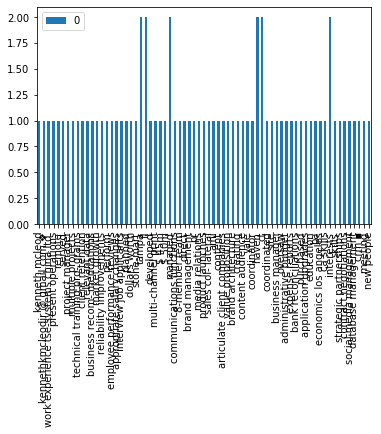

In [58]:
import pandas
from collections import Counter
letter_counts = Counter(phrases)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

In [59]:
from itertools import dropwhile

for key, count in dropwhile(lambda key_count: key_count[1] >= 2, letter_counts.most_common()):
    del letter_counts[key]

In [60]:
letter_counts

Counter({'tampa': 2,
         'fl': 2,
         'managed': 2,
         'haven': 2,
         'ct': 2,
         'interests': 2})